<a href="https://colab.research.google.com/github/jitendra19/stock-market-prediction/blob/main/Stock_market_prediction_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
pip install yfinance

In [61]:
# Import Python Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')

plt.style.use("fivethirtyeight")
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For reading stock data from yahoo
# from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [62]:
stockName = 'AAPL'
periodOfData = "1mo"

# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
ticker = yf.Ticker(stockName)
df = ticker.history(period=periodOfData, auto_adjust=True)

# Show the data
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-14,171.339996,173.779999,171.089996,173.070007,80355000,0,0
2022-01-18,171.509995,172.539993,169.410004,169.800003,90956700,0,0
2022-01-19,170.000000,171.080002,165.940002,166.229996,94815000,0,0
2022-01-20,166.979996,169.679993,164.179993,164.509995,91420500,0,0
2022-01-21,164.419998,166.330002,162.300003,162.410004,122501300,0,0


In [63]:
withDateColumn = df.reset_index();
withDateColumn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21 non-null     datetime64[ns]
 1   Open          21 non-null     float64       
 2   High          21 non-null     float64       
 3   Low           21 non-null     float64       
 4   Close         21 non-null     float64       
 5   Volume        21 non-null     int64         
 6   Dividends     21 non-null     int64         
 7   Stock Splits  21 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 1.4 KB


In [64]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

close_df = df[['Close']]
close_df[['Close']].tail()

,Close
Date,
2022-01-14,173.070007
2022-01-18,169.800003
2022-01-19,166.229996
2022-01-20,164.509995
2022-01-21,162.410004


The target variable is the outcome which the machine learning model will predict based on the explanatory variables. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow’s price is greater than today’s price then we will buy the particular Stock else we will have no position in the. We will store +1 for a buy signal and 0 for a no position in y.

In [65]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [66]:
split_percentage = 0.9
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

Support Vector Classifier (SVC)

In [67]:
from sklearn.svm import SVR, SVC

In [68]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
Y = cls.predict(X_test)
accuracy_score(Y, y_test)

1.0

In [71]:
# from prettytable import PrettyTable

# myTable = PrettyTable(["target", "Prediction"]) 

# for i in range(15):
#     # print(forecast[i][0], ' ---> ',svm_prediction[i])
#     myTable.add_row([Y[i], y_test[i]])

# print(myTable)

In [72]:
df['Predicted_Signal'] = cls.predict(X)
df['Return'] = df.Close.pct_change()
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,
2021-12-22,173.039993,175.860001,172.149994,175.639999,92135300,0,0,-2.600006,3.710007,1,NaN,NaN,NaN,NaN
2021-12-23,175.850006,176.850006,175.270004,176.279999,68356600,0,0,-0.429993,1.580002,1,0.003644,0.003644,0.003644,0.003644
2021-12-27,177.089996,180.419998,177.070007,180.330002,74919600,0,0,-3.240005,3.349991,1,0.022975,0.022975,0.026619,0.026619
2021-12-28,180.160004,181.330002,178.529999,179.289993,79144300,0,0,0.870010,2.800003,1,-0.005767,-0.005767,0.020851,0.020851
2021-12-29,179.330002,180.630005,178.139999,179.380005,62348900,0,0,-0.050003,2.490005,1,0.000502,0.000502,0.021353,0.021353
2021-12-30,179.470001,180.570007,178.089996,178.199997,59773000,0,0,1.270004,2.480011,1,-0.006578,-0.006578,0.014775,0.014775
2021-12-31,178.089996,179.229996,177.259995,177.570007,64062300,0,0,0.519989,1.970001,1,-0.003535,-0.003535,0.011240,0.011240
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900,0,0,-4.179993,5.169998,1,0.025004,0.025004,0.036244,0.036244
2022-01-04,182.630005,182.940002,179.119995,179.699997,99310400,0,0,2.930008,3.820007,0,-0.012692,-0.012692,0.023552,0.023552


#Plot Strategy Returns vs Original Returns

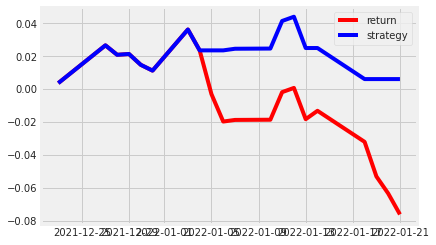

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red',label= 'return')
plt.plot(df['Cum_Strategy'],color='blue', label= 'strategy')
plt.legend()

# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()

# using SVR
# Support Vector Regression (SVR) is the combination of a Support Vector Machines and Regression.

#### Linear Regression won’t work on our data because our data has many fluctuations and a linear line of best fit would give poor predictions on stock data. A SVM will not work on our data because we aren’t classifying between two different classes.

In [ ]:
withDateColumn.info()
# withDateColumn['Date']

In [75]:
dates = withDateColumn['Date'].to_numpy()
prices = withDateColumn['Close'].to_numpy()
org_dates = withDateColumn['Date']

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

SVR(C=1000.0, gamma=0.1)

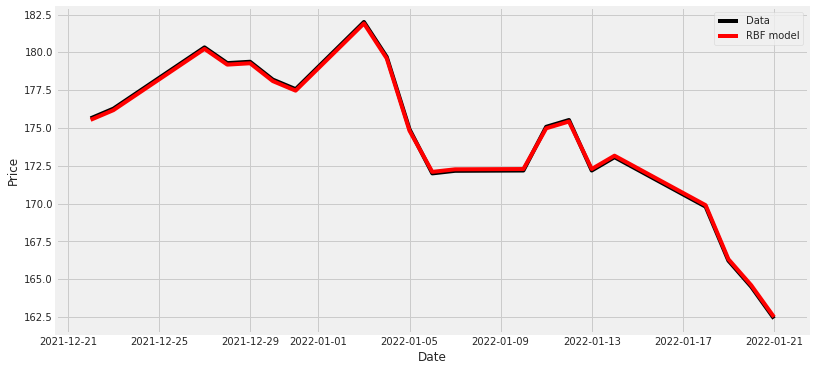

In [76]:
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

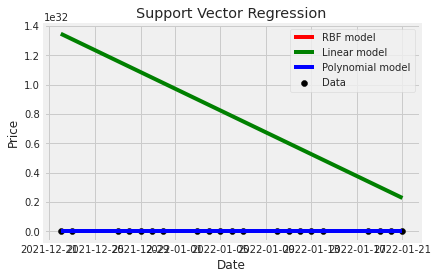

RBF: [174.2] LIN: [7.09884333e+34] POLY: [-2.11177985e+11]


In [94]:
# ML Model Based on Siraj Raval's Stock Price Prediction Tutorial
# Support Vector Regression Models (Linear, Polynomial, RBF) for predicting future stock high prices

dfdates  = withDateColumn['Date'].to_numpy()
dfprices = withDateColumn['Close'].to_numpy()

#input: dates, prices of length n for n days
#trains models, plots models, returns each model's prediction on day #x
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    svr_lin = SVR(kernel= 'linear', C= 1e3)
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
    svr_rbf.fit(dates, prices) # fitting the data points in the models
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)

    plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
    plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    # print(svr_rbf.predict([[x]]))
    withDateColumn['rbf'] = svr_rbf.predict(dates)
    withDateColumn['lin'] = svr_lin.predict(dates)
    withDateColumn['poly'] = svr_poly.predict(dates)
    # return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]
    return svr_rbf.predict([[x]]), svr_lin.predict([[x]]), svr_poly.predict([[x]])

#reverses prices list, which was fed in reverse chronological order originally
# dfprices.reverse()
dfprices[:] = dfprices[::-1]

#trains models, so far model not fast enough for >20 day inputs
predicted_price = predict_prices(dfdates, dfprices, 5)

#prints out predictions from prediction function
# print("RBF:", predicted_price[0],"LIN:", predicted_price[1],"POLY:", predicted_price[2])
print("RBF:", predicted_price[0],"LIN:", predicted_price[1],"POLY:", predicted_price[2])

In [99]:
from prettytable import PrettyTable

myTable = PrettyTable(["closing price", "Prediction"]) 

for i in range(15):
    myTable.add_row([withDateColumn['Close'][i], withDateColumn['rbf'][i]])

print(myTable)

+--------------------+--------------------+
|   closing price    |     Prediction     |
+--------------------+--------------------+
| 162.41000366210938 | 162.50992639064782 |
| 164.50999450683594 | 164.61022999286644 |
| 166.22999572753906 | 166.3299947738647  |
| 169.8000030517578  | 169.89953241348263 |
| 173.07000732421875 | 173.16953668594357 |
| 172.19000244140625 | 172.2900014877319  |
| 175.52999877929688 | 175.43023426532739 |
| 175.0800018310547  | 174.9800017356872  |
| 172.19000244140625 | 172.28953180313107 |
| 172.1699981689453  | 172.27015388011927 |
|       172.0        | 172.0999227285385  |
| 174.9199981689453  | 174.82034975290296 |
| 179.6999969482422  | 179.59991967678064 |
| 182.00999450683594 | 181.91019054651258 |
| 177.57000732421875 | 177.4699300527572  |
+--------------------+--------------------+


In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(withDateColumn['Close'], withDateColumn['rbf'])
print('MSE: '+str(mse))

mae = mean_absolute_error(withDateColumn['Close'], withDateColumn['rbf'])
print('MAE: '+str(mae))

rmse = sqrt(mean_squared_error(withDateColumn['Close'], withDateColumn['rbf']))
print('RMSE: %.3f' % rmse)

mape = np.mean(np.abs(withDateColumn['rbf'] - withDateColumn['Close'])/np.abs(withDateColumn['Close']))
print('MAPE: '+str(mape))

MSE: 0.009977634126487942
MAE: 0.09988788877215002
RMSE: 0.100
MAPE: 0.0005738715465216427
